In [140]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

In [124]:
data_dir = "./data/"
train = pd.read_csv(data_dir + "train.csv")
num_train = train.shape[0]
print("%d train examples." % num_train)

159571 train examples.


### View examples

In [125]:
train.iloc

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Main things we want to explore:
1. Distribution of lengths of comments (in # of tokens) -- for setting max_sequence_len on RNN
2. Class distributions
3. Vocabulary -- number of unique words, histogram of word + counts
4. Character-level Vocabulary -- number of unique characters, histogram of character occurrences 

## Comment lengths (# tokens)

In [129]:
# lens = train.comment_text.str.split(" ").str.len
lens = [len(c) for c in tokenized_comments]

In [137]:
pdf = np.zeros((max_len, ))
for l in lens:
    pdf[l - 1] += 1.0
pdf /= len(lens)

cdf = np.cumsum(pdf)
print(np.argmax(pdf))

4


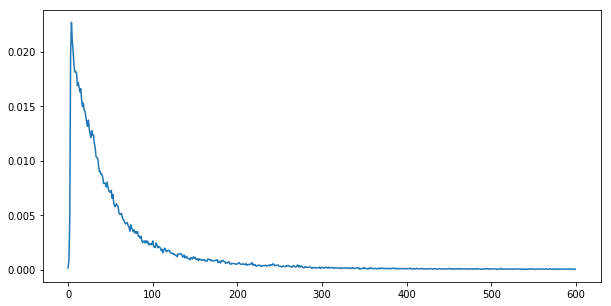

In [135]:
plt.plot(pdf[:600])

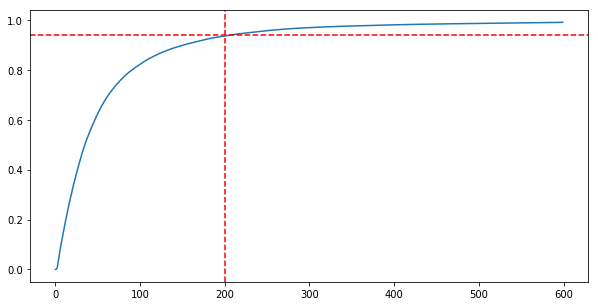

In [110]:
plt.plot(cdf[:600])
plt.axhline(y=0.94, color="r", linestyle="--")
plt.axvline(x=200, color="r", linestyle="--")

It looks like setting max_sequence_len to **500** is more than safe, as 99% of all comments will be fully covered.

We may be able to reduce this a bit if it is too long. For example, **200** covers ~94% of all comments.

## Class Distribution

In [101]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
num_toxic = train[label_cols].max(axis=1).sum()
print("%d toxic examples (%0.02f percent of train)" % (num_toxic, (num_toxic / num_train) * 100))

16225 toxic examples (10.17 percent of train)


There's only 16225 toxic comments (any form of toxic) out of the 159571 training examples. This implies we could have a naive baseline that always outputs "not toxic" that obtains an accuracy of **89.93%**!

In [122]:
label_dist = train[label_cols].sum(axis=0)
print("total train examples: %d" % num_train)
print()
print(label_dist)

total train examples: 159571

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


## Character Distribution

In [142]:
# Get raw char counts
i, print_every = 0, 10000
char_counts = defaultdict(int)
for ex in train:
    print(ex)
    
# with io.open(train_context_file, encoding="utf-8") as f:
#     for line in f:
#         i += 1
#         for c in "".join(line.split(" ")):
#             if isinstance(c, str):
#                 c = unicode(c, 'utf-8')
#             char_counts[c] += 1
#         if i % print_every == 0:
#             print "Processed %d examples..." % (i)
            
# # Trim down character vocab size by creating <UNK> char
# # Vocabulary |V| = 50 -- alphanumeric characters, common punctuation
# vocab = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o",
#          "p", "q", "r", "s", "t", "u", "v", "x", "y", "z", "0", "1", "2", "3", "4",
#          "5", "6", "7", "8", "9", ",", ".", "!", "(", ")", "[", "]", "%", "'", "-", 
#          "/", '"', "?", "$", "<UNK>"]
# keys_to_remove = []
# char_counts[u"<UNK>"] = 0
# for k,v in char_counts.iteritems():
#     if k not in vocab:
#         char_counts[u"<UNK>"] += v
#         keys_to_remove.append(k)
# for k in keys_to_remove:
#     char_counts.pop(k)
        
# names = list(char_counts.keys())
# values = list(char_counts.values())
# sorted_names = [name for _,name in sorted(zip(values,names))]
# sorted_values = sorted(values)

id
comment_text
toxic
severe_toxic
obscene
threat
insult
identity_hate
